<a href="https://colab.research.google.com/github/NeuralXP/deteccao_fraude_1/blob/main/deteccao_fraude_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importação de bibliotecas
import pandas as pd       # pandas para manipulação de dados em tabelas (DataFrames)
import numpy as np        # numpy para operações numéricas e matrizes
import seaborn as sns     # seaborn para visualizações estatísticas
import matplotlib.pyplot as plt  # matplotlib para plotagens
from sklearn.model_selection import train_test_split  # para dividir dados em treino e teste
import plotly.express as px    # plotly para gráficos interativos
from sklearn.tree import DecisionTreeClassifier  # modelo de árvore de decisão
from sklearn.metrics import (                         # métricas de avaliação do modelo
    accuracy_score,                                  # precisão\
    confusion_matrix,                                # matriz de confusão
    classification_report                            # relatório de desempenho (precisão, recall, f1)
)

In [2]:
# 1. Carregamento dos dados
# Substitua o caminho abaixo pelo local correto do arquivo CSV
df = pd.read_csv('/content/drive/MyDrive/amostras_de_dados/online_fraud.csv')

In [3]:
# 2. Exploração inicial dos dados
print("-- Cabeçalho dos primeiros registros --")
print(df.head(10))            # mostra as primeiras 10 linhas do DataFrame

print("\n-- Informações gerais --")
print(df.info())              # exibe tipos de colunas e contagem de valores não nulos

print("\n-- Dimensões do conjunto de dados --")
print(df.shape)               # (número de linhas, número de colunas)

# Exibe valores únicos da coluna 'type' para entender categorias de transação
print("\n-- Tipos de transação únicos --")
print(df['type'].unique())

# Exibe distribuição da classe alvo 'isFraud'
print("\n-- Distribuição de fraud (1) e não fraud (0) --")
print(df['isFraud'].value_counts(normalize=True))

-- Cabeçalho dos primeiros registros --
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815      170136.00       160296.36   
1     1   PAYMENT   1864.28  C1666544295       21249.00        19384.72   
2     1  TRANSFER    181.00  C1305486145         181.00            0.00   
3     1  CASH_OUT    181.00   C840083671         181.00            0.00   
4     1   PAYMENT  11668.14  C2048537720       41554.00        29885.86   
5     1   PAYMENT   7817.71    C90045638       53860.00        46042.29   
6     1   PAYMENT   7107.77   C154988899      183195.00       176087.23   
7     1   PAYMENT   7861.64  C1912850431      176087.23       168225.59   
8     1   PAYMENT   4024.36  C1265012928        2671.00            0.00   
9     1     DEBIT   5337.77   C712410124       41720.00        36382.23   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0            0.00        0     

In [4]:
# 3. Visualização de distribuição de tipos de transação
# Prepara dados para gráfico de pizza
trans_count = df['type'].value_counts()
fig1 = px.pie(
    names=trans_count.index,           # rótulos para fatias do gráfico
    values=trans_count.values,         # valores para cada fatia
    title='Distribuição de Tipos de Transação',
    hole=0.4                           # deixa o meio do gráfico vazio (donut)
)
fig1.show()

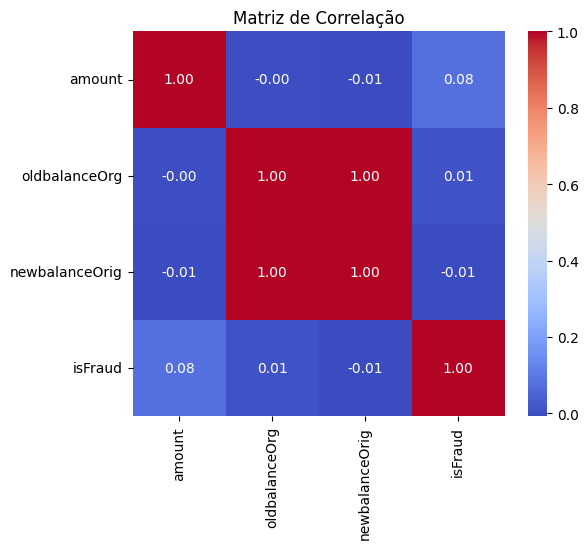

In [5]:
# 4. Análise de correlação entre variáveis quantitativas
# Seleciona colunas numéricas para correlação
corr_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'isFraud']
corr_matrix = df[corr_features].corr()    # calcula matriz de correlação
plt.figure(figsize=(6,5))                # define tamanho da figura
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')  # heatmap com anotações
plt.title('Matriz de Correlação')
plt.show()

In [6]:
# 5. Pré-processamento: codificação da variável categórica 'type'
# Mapeia cada tipo para um número inteiro
type_mapping = {
    'CASH_OUT': 1,
    'PAYMENT': 2,
    'CASH_IN': 3,
    'TRANSFER': 4,
    'DEBIT': 5
}
df['type'] = df['type'].map(type_mapping)  # substitui valores de texto por números

In [7]:
# 6. Seleção de features (variáveis independentes) e target (variável dependente)
features = ['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig']  # colunas que vamos usar para treinar
X = df[features]                     # DataFrame X com as features

y = df['isFraud']                    # Series y com a variável alvo

# 7. Divisão dos dados em treino e teste
# test_size=0.2 -> 20% dos dados serão para teste
# random_state garante reprodutibilidade
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


Acurácia do modelo: 99.97%


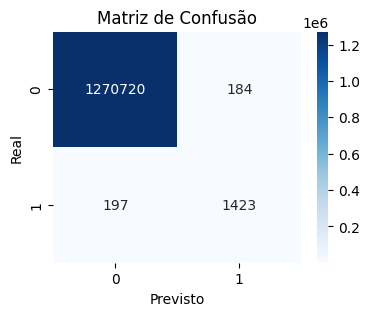


Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.89      0.88      0.88      1620

    accuracy                           1.00   1272524
   macro avg       0.94      0.94      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524



In [8]:
# 8. Criação e treinamento do modelo
model = DecisionTreeClassifier(random_state=42)  # instancia o classificador
model.fit(X_train, y_train)                     # ajusta o modelo aos dados de treino

# 9. Previsões e avaliação
# Gera previsões para o conjunto de teste
y_pred = model.predict(X_test)

# Calcula a acurácia (percentual de previsões corretas)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAcurácia do modelo: {accuracy:.2%}")

# Gera e exibe a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

# Exibe relatório de classificação mais detalhado
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

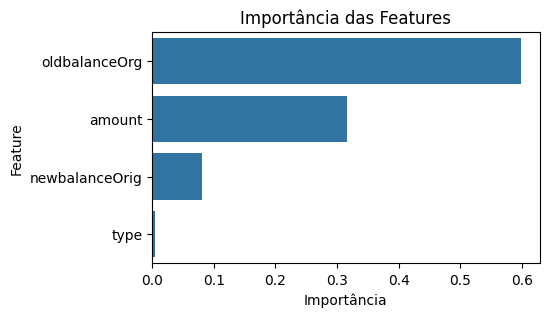

In [9]:
# 10. Importância das features
# Extrai importâncias do modelo e organiza em Series
importances = pd.Series(model.feature_importances_, index=features)
importances = importances.sort_values(ascending=False)  # ordena do mais importante ao menos

# Plota gráfico de barras da importância
plt.figure(figsize=(5,3))
sns.barplot(x=importances.values, y=importances.index)
plt.title('Importância das Features')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.show()

In [10]:
# 11. Exemplo de previsão individual

# Exemplo de transação: [tipo, valor, saldo_antigo, saldo_novo]
# Aqui usamos tipo=2 (PAYMENT), valor=9800, saldos conforme exemplo
teste_exemplo = np.array([[2, 9800, 170136, 160296]])

# Modelo faz previsão para o exemplo
pred_exemplo = model.predict(teste_exemplo)
print(f"\nPrevisão para exemplo individual: {'Fraude' if pred_exemplo[0]==1 else 'Não Fraude'}")


Previsão para exemplo individual: Não Fraude


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names

